<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1">Table of Contents</a></span><ul class="toc-item"><li><span><a href="#Part-I-:-Exploratory-Data-Analysis" data-toc-modified-id="Part-I-:-Exploratory-Data-Analysis-1.1"><a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a></a></span></li><li><span><a href="#Part-II:-Rank-Based-Recommendations" data-toc-modified-id="Part-II:-Rank-Based-Recommendations-1.2"><a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a></a></span></li><li><span><a href="#Part-III:-User-User-Based-Collaborative-Filtering" data-toc-modified-id="Part-III:-User-User-Based-Collaborative-Filtering-1.3"><a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a></a></span></li><li><span><a href="#Part-IV:-Content-Based-Recommendations-(EXTRA---NOT-REQUIRED)" data-toc-modified-id="Part-IV:-Content-Based-Recommendations-(EXTRA---NOT-REQUIRED)-1.4"><a class="anchor" id="Content-Recs">Part IV: Content Based Recommendations (EXTRA - NOT REQUIRED)</a></a></span></li><li><span><a href="#This-part-is-NOT-REQUIRED-to-pass-this-project.--However,-you-may-choose-to-take-this-on-as-an-extra-way-to-show-off-your-skills." data-toc-modified-id="This-part-is-NOT-REQUIRED-to-pass-this-project.--However,-you-may-choose-to-take-this-on-as-an-extra-way-to-show-off-your-skills.-1.5">This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.</a></span></li><li><span><a href="#This-part-is-NOT-REQUIRED-to-pass-this-project.--However,-you-may-choose-to-take-this-on-as-an-extra-way-to-show-off-your-skills." data-toc-modified-id="This-part-is-NOT-REQUIRED-to-pass-this-project.--However,-you-may-choose-to-take-this-on-as-an-extra-way-to-show-off-your-skills.-1.6">This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.</a></span></li><li><span><a href="#This-part-is-NOT-REQUIRED-to-pass-this-project.--However,-you-may-choose-to-take-this-on-as-an-extra-way-to-show-off-your-skills." data-toc-modified-id="This-part-is-NOT-REQUIRED-to-pass-this-project.--However,-you-may-choose-to-take-this-on-as-an-extra-way-to-show-off-your-skills.-1.7">This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.</a></span></li><li><span><a href="#Part-V:-Matrix-Factorization" data-toc-modified-id="Part-V:-Matrix-Factorization-1.8"><a class="anchor" id="Matrix-Fact">Part V: Matrix Factorization</a></a></span></li></ul></li></ul></div>

# Recommendations with IBM


## Table of Contents

I. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
II. [Rank Based Recommendations](#Rank)<br>
III. [User-User Based Collaborative Filtering](#User-User)<br>
IV. [Content Based Recommendations (EXTRA - NOT REQUIRED)](#Content-Recs)<br>
V. [Matrix Factorization](#Matrix-Fact)<br>
VI. [Extras & Concluding](#conclusions)

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import project_tests as t
import pickle
from IPython.core.display import display, HTML

%matplotlib inline

display(HTML("<style>.container { width:90% !important; }</style>"))

pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option('display.max_colwidth', 500)

df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Show df to get an idea of the data
df.head()

,article_id,title,email
0,1430.00,"using pixiedust for fast, flexible, and easier data analysis and experimentation",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.00,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.00,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.00,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.00,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [149]:
# Show df_content to get an idea of the data
df_content.head()

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,"Skip navigation Sign in SearchLoading...\r\n\r\nClose Yeah, keep it Undo CloseTHIS VIDEO IS UNAVAILABLE.\r\nWATCH QUEUE\r\nQUEUE\r\nWatch Queue Queue * Remove all\r\n * Disconnect\r\n\r\nThe next video is starting stop 1. Loading...\r\n\r\nWatch Queue Queue __count__/__total__ Find out why CloseDEMO: DETECT MALFUNCTIONING IOT SENSORS WITH STREAMING ANALYTICS\r\nIBM AnalyticsLoading...\r\n\r\nUnsubscribe from IBM Analytics? Cancel UnsubscribeWorking...\r\n\r\nSubscribe Subscribed Unsubscribe ...",Detect bad readings in real time using Python and Streaming Analytics.,Detect Malfunctioning IoT Sensors with Streaming Analytics,Live,0
1,"No Free Hunch Navigation * kaggle.com\r\n\r\n * kaggle.com\r\n\r\nCommunicating data science: A guide to presenting your work 4COMMUNICATING DATA SCIENCE: A GUIDE TO PRESENTING YOUR WORK\r\nMegan Risdal | 06.29.2016\r\n\r\nSee the forest, see the trees . Here lies the challenge in both performing and presenting an analysis. As\r\ndata scientists, analysts, and machine learning engineers faced with fulfilling\r\nbusiness objectives, we find ourselves bridging the gap between The Two Cultures ...","See the forest, see the trees. Here lies the challenge in both performing and presenting an analysis. As data scientists, analysts, and machine learning engineers faced with fulfilling business obj…",Communicating data science: A guide to presenting your work,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Paths\r\n * Courses * Our Courses\r\n * Partner Courses\r\n \r\n \r\n * Badges * Our Badges\r\n * BDU Badge Program\r\n \r\n \r\n * Watson Student Advisor\r\n\r\n * \r\n\r\nBLOG\r\nWelcome to the BDUBlog .SUBCRIBE VIA FEED\r\nRSS - Posts\r\n\r\nRSS - Comments\r\n\r\nSUBSCRIBE VIA EMAIL\r\nEnter your email address to subscribe to this blog and receive notifications of\r\nnew posts by email.\r\n\r\nEmail Address\r\n\r\n\r\n\r\nRECENT POS...,Here’s this week’s news in Data Science and Big Data.,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCALE - BOOST THE PERFORMANCE OF YOUR\r\nDISTRIBUTED DATABASE\r\nShare on Twitter Share on Facebook Share on Google+ Vote on Hacker News Published Dec 29, 2016Learn how distributed DBs (Cassandra, MongoDB, RethinkDB, etc) solve the problem\r\nof scaling persistent storage, but introduce latency as data size increases and\r\nbecome I/O bound. In single server DBs, latency is solved by introducing\r\ncaching. In this talk, Akbar Ahmed shows you how to...","Learn how distributed DBs solve the problem of scaling persistent storage, but introduce latency as data size increases and become I/O bound.",DataLayer Conference: Boost the performance of your distributed database,Live,3
4,"Skip navigation Sign in SearchLoading...\r\n\r\nClose Yeah, keep it Undo CloseTHIS VIDEO IS UNAVAILABLE.\r\nWATCH QUEUE\r\nQUEUE\r\nWatch Queue Queue * Remove all\r\n * Disconnect\r\n\r\nThe next video is starting stop 1. Loading...\r\n\r\nWatch Queue Queue __count__/__total__ Find out why CloseDATA SCIENCE EXPERIENCE: ANALYZE NY RESTAURANT INSPECTIONS DATA\r\ndeveloperWorks TVLoading...\r\n\r\nUnsubscribe from developerWorks TV? Cancel UnsubscribeWorking...\r\n\r\nSubscribe Subscribed Unsub...",This video demonstrates the power of IBM DataScience Experience using a simple New York State Restaurant Inspections data scenario.,Analyze NY Restaurant data using Spark in DSX,Live,4


### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

Use the dictionary and cells below to provide some insight into the descriptive statistics of the data.

`1.` What is the distribution of how many articles a user interacts with in the dataset?  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user interacts with an article.  

In [150]:
df.nunique(dropna=True) # 714 different articles being interacted with by 5148 users

article_id     714
title          714
email         5148
dtype: int64

In [151]:
df.isna().sum() # 17 interactions without user-mail-info

article_id     0
title          0
email         17
dtype: int64

In [152]:
# df.dropna(subset=["email"], inplace=True) # drop interactions without user info -> deactivated so the test works

In [153]:
user_article_interactions = df.email.value_counts()

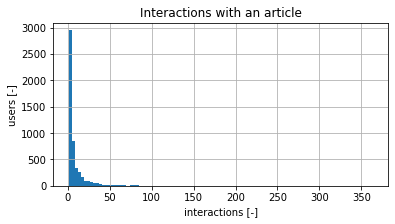

In [154]:
fig, ax = plt.subplots(figsize = (6,3))
ax = user_article_interactions.hist(bins=100)
ax.set_title("Interactions with an article")
ax.set_ylabel("users [-]")
ax.set_xlabel("interactions [-]");

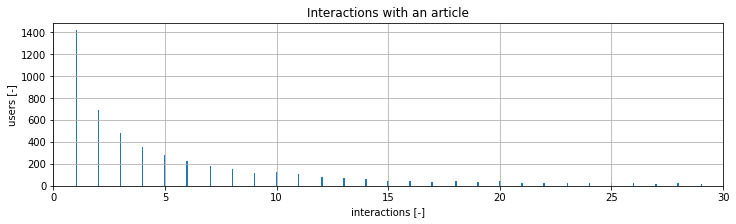

In [155]:
# zoom of interactions histogram
fig, ax = plt.subplots(figsize = (12,3))
ax = user_article_interactions.hist(bins=len(user_article_interactions))
ax.set_title("Interactions with an article")
ax.set_ylabel("users [-]")
ax.set_xlabel("interactions [-]")
ax.set_xlim(0,30);

In [156]:
# Fill in the median and maximum number of user_article interactios below

median_val = user_article_interactions.median() # 50% of individuals interact with 3 articles or fewer.
max_views_by_user = user_article_interactions.max() # The maximum number of user-article interactions by any 1 user is 364.

`2.` Explore and remove duplicate articles from the **df_content** dataframe.  

In [157]:
# Find and explore duplicate articles
df_content.article_id.duplicated().sum() # 5 articles with duplicates in the df_content
df_content[df_content.article_id.duplicated(keep=False)].sort_values(by="article_id")

,doc_body,doc_description,doc_full_name,doc_status,article_id
50,"Follow Sign in / Sign up Home About Insight Data Science Data Engineering Health Data AI Never miss a story from Insight Data , when you sign up for Medium. Learn more Never miss a story from Insight Data Get updates Get updates Sebastien Dery Blocked Unblock Follow Following I don’t know what I’m doing; but then neither do you so it’s all good. Master\r\nof Layers, Protector of the Graph, Wielder of Knowledge. #OpenScience Oct 16\r\n----------------------------------------------------------...",Community Detection at Scale,Graph-based machine learning,Live,50
365,"Follow Sign in / Sign up Home About Insight Data Science Data Engineering Health Data AI 5 * Share\r\n * 5\r\n * \r\n * \r\n\r\nNever miss a story from Insight Data , when you sign up for Medium. Learn more Never miss a story from Insight Data Get updates Get updates Sebastien Dery Blocked Unblock Follow Following Master of Layers, Protector of the Graph, Wielder of Knowledge. #OpenScience\r\n#NoBullshit 2 days ago\r\n--------------------------------------------------------------------------...",During the seven-week Insight Data Engineering Fellows Program recent grads and experienced software engineers learn the latest open source technologies by building a data platform to handle large…,Graph-based machine learning,Live,50
221,"* United States\r\n\r\nIBM® * Site map\r\n\r\nSearch within Bluemix Blog Bluemix Blog * About Bluemix * What is Bluemix\r\n * Getting Started\r\n * Case Studies\r\n * Hybrid Architecture\r\n * Open Source\r\n * Trust, Security, Privacy\r\n * Data Centers\r\n * Our Network\r\n * Automation\r\n * Architecture Center\r\n \r\n \r\n * Products * Compute Infrastructure\r\n * Compute Services\r\n * Hybrid Deployments\r\n * Watson\r\n * Internet of Things\r...","When used to make sense of huge amounts of constantly changing data, smart catalog capabilities can make all the difference.",How smart catalogs can turn the big data flood into an ocean of opportunity,Live,221
692,"Homepage Follow Sign in / Sign up Homepage * Home\r\n * Data Science Experience\r\n * Data Catalog\r\n * \r\n * Watson Data Platform\r\n * \r\n\r\nSusanna Tai Blocked Unblock Follow Following Offering Manager, Watson Data Platform | Data Catalog Oct 30\r\n--------------------------------------------------------------------------------\r\n\r\nHOW SMART CATALOGS CAN TURN THE BIG DATA FLOOD INTO AN OCEAN OF OPPORTUNITY\r\nOne of the earliest documented catalogs was compiled at the great library...","One of the earliest documented catalogs was compiled at the great library of Alexandria in the third century BC, to help scholars manage, understand and access its vast collection of literature…",How smart catalogs can turn the big data flood into an ocean of opportunity,Live,221
232,"Homepage Follow Sign in Get started Homepage * Home\r\n * Data Science Experience\r\n * Data Catalog\r\n * IBM Data Refinery\r\n * \r\n * Watson Data Platform\r\n * \r\n\r\nCarmen Ruppach Blocked Unblock Follow Following Offering Manager for Data Refinery on Watson Data Platform at IBM Nov 14\r\n--------------------------------------------------------------------------------\r\n\r\nSELF-SERVICE DATA PREPARATION WITH IBM DATA REFINERY\r\nIf you are like most data scientists, you are probably ...","If you are like most data scientists, you are probably spending a lot of time to cleanse, shape and prepare your data before you can actually start with the more enjoyable part of building and…",Self-service data preparation with IBM Data Refinery,Live,232
971,"Homepage Follow Sign in Get started * Home\r\n * Data Science Experience\r\n * Data Catalog\r\n * IBM Data Refinery\r\n * \r\n * Watson Data Platform\r\n * \r\n\r\nCarmen Ruppach Blocked Unblock Follow Following Offering Manager for Data Refinery on Watson Data Platform at IBM Nov 14, 2017\r\n--------------------------------------------------------------------------------\r\n\r\nSELF-SERVICE

In [158]:
# remove duplicates
""" changed this section after having struggle with the first results-test
# article_id 50 has less description info in index 50; article_id 221 duplicates seem to be 2 different articles -> assign new id to one of them.
df_content.at[692, "article_id"] = df_content.article_id.values.max()+1 # reassign article_id for idx 692
df_content.drop(index=[50, 971, 761, 970], inplace=True)
df_content = df_content.sort_values(by="article_id").reset_index()
"""

' changed this section after having struggle with the first results-test\n# article_id 50 has less description info in index 50; article_id 221 duplicates seem to be 2 different articles -> assign new id to one of them.\ndf_content.at[692, "article_id"] = df_content.article_id.values.max()+1 # reassign article_id for idx 692\ndf_content.drop(index=[50, 971, 761, 970], inplace=True)\ndf_content = df_content.sort_values(by="article_id").reset_index()\n'

In [159]:
df_content.drop_duplicates(inplace=True)
df_content.describe().transpose()
print("There are {} articles, that haven't been interacted with.".format(df_content.article_id.nunique()-df.article_id.nunique()))

There are 337 articles, that haven't been interacted with.


`3.` Use the cells below to find:

**a.** The number of unique articles that have an interaction with a user.  
**b.** The number of unique articles in the dataset (whether they have any interactions or not).<br>
**c.** The number of unique users in the dataset. (excluding null values) <br>
**d.** The number of user-article interactions in the dataset.

In [160]:
unique_articles = df.article_id.nunique() # The number of unique articles that have at least one interaction
total_articles = df_content.article_id.nunique() # The number of unique articles on the IBM platform
unique_users = df.email.nunique() # The number of unique users
user_article_interactions = df.shape[0] # The number of user-article interactions

`4.` Use the cells below to find the most viewed **article_id**, as well as how often it was viewed.  After talking to the company leaders, the `email_mapper` function was deemed a reasonable way to map users to ids.  There were a small number of null values, and it was found that all of these null values likely belonged to a single user (which is how they are stored using the function below).

In [161]:
most_viewed_article_id = str(df.article_id.value_counts().sort_values().index[-1].round(1)) # The most viewed article in the dataset as a string with one value following the decimal 
max_views = df.article_id.value_counts().sort_values().iloc[-1] # The most viewed article in the dataset was viewed how many times?

In [162]:
## No need to change the code here - this will be helpful for later parts of the notebook
# Run this cell to map the user email to a user_id column and remove the email column

def email_mapper():
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# show header
df.head()

,article_id,title,user_id
0,1430.00,"using pixiedust for fast, flexible, and easier data analysis and experimentation",1
1,1314.00,healthcare python streaming application demo,2
2,1429.00,use deep learning for image classification,3
3,1338.00,ml optimization using cognitive assistant,4
4,1276.00,deploy your python model as a restful api,5


In [163]:
## If you stored all your results in the variable names above, 
## you shouldn't need to change anything in this cell

sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': most_viewed_article_id,
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}

# Test your dictionary against the solution
t.sol_1_test(sol_1_dict)

It looks like you have everything right here! Nice job!


### <a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a>

Unlike in the earlier lessons, we don't actually have ratings for whether a user liked an article or not.  We only know that a user has interacted with an article.  In these cases, the popularity of an article can really only be based on how often an article was interacted with.

`1.` Fill in the function below to return the **n** top articles ordered with most interactions as the top. Test your function using the tests below.

In [164]:
def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    # Your code here
    df['article_interaction_count'] = df.groupby('article_id', sort=True)['article_id'].transform('count')
    df_interactions_ranked = df.drop("user_id", axis=1).sort_values("article_interaction_count", ascending=False).drop_duplicates(subset=["article_id"])
    top_articles = list(df_interactions_ranked.title.iloc[:n])
    
    return top_articles # Return the top article titles from df (not df_content)

def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    # Your code here
    df['article_interaction_count'] = df.groupby('article_id', sort=True)['article_id'].transform('count')
    df_interactions_ranked = df.drop("user_id", axis=1).sort_values("article_interaction_count", ascending=False).drop_duplicates(subset=["article_id"])
    top_articles = list(df_interactions_ranked.article_id.iloc[:n])
 
    return top_articles # Return the top article ids

In [165]:
print(get_top_articles(10))
print(get_top_article_ids(10))

['use deep learning for image classification', 'insights from new york car accident reports', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm', 'healthcare python streaming application demo', 'finding optimal locations of new store using decision optimization', 'apache spark lab, part 1: basic concepts', 'analyze energy consumption in buildings', 'gosales transactions for logistic regression model']
[1429.0, 1330.0, 1431.0, 1427.0, 1364.0, 1314.0, 1293.0, 1170.0, 1162.0, 1304.0]


In [166]:
# Test your function by returning the top 5, 10, and 20 articles
top_5 = get_top_articles(5)
top_10 = get_top_articles(10)
top_20 = get_top_articles(20)

# Test each of your three lists from above
t.sol_2_test(get_top_articles)

Your top_5 looks like the solution list! Nice job.
Your top_10 looks like the solution list! Nice job.
Your top_20 looks like the solution list! Nice job.


### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


`1.` Use the function below to reformat the **df** dataframe to be shaped with users as the rows and articles as the columns.  

* Each **user** should only appear in each **row** once.


* Each **article** should only show up in one **column**.  


* **If a user has interacted with an article, then place a 1 where the user-row meets for that article-column**.  It does not matter how many times a user has interacted with the article, all entries where a user has interacted with an article should be a 1.  


* **If a user has not interacted with an item, then place a zero where the user-row meets for that article-column**. 

Use the tests to make sure the basic structure of your matrix matches what is expected by the solution.

In [167]:
# create the user-article matrix with 1's and 0's

def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    # Fill in the function here
    user_item = df.groupby(['user_id', 'article_id'])['article_interaction_count'].max().unstack()
    user_item.columns = user_item.columns.astype(int)
    user_item = user_item.sort_index(axis=0).sort_index(axis=1)
    user_item[~user_item.isna()] = 1
    user_item = user_item.fillna(0)
    user_item = user_item.astype(int)
    
    return user_item # return the user_item matrix 

user_item = create_user_item_matrix(df)

In [168]:
## Tests: You should just need to run this cell.  Don't change the code.
assert user_item.shape[0] == 5149, "Oops!  The number of users in the user-article matrix doesn't look right."
assert user_item.shape[1] == 714, "Oops!  The number of articles in the user-article matrix doesn't look right."
assert user_item.sum(axis=1)[1] == 36, "Oops!  The number of articles seen by user 1 doesn't look right."
print("You have passed our quick tests!  Please proceed!")

You have passed our quick tests!  Please proceed!


`2.` Complete the function below which should take a user_id and provide an ordered list of the most similar users to that user (from most similar to least similar).  The returned result should not contain the provided user_id, as we know that each user is similar to him/herself. Because the results for each user here are binary, it (perhaps) makes sense to compute similarity as the dot product of two users. 

Use the tests to test your function.

In [169]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # compute similarity of each user to the provided user
    user_vec = np.array(user_item.loc[user_id]).reshape(-1,1)
    matrix = user_item.values
    sim = np.dot(matrix, user_vec)
    df_sim = pd.DataFrame(sim, index=user_item.index, columns=["user_similarity"])
    
    # sort by similarity
    df_sim = df_sim.sort_values(by="user_similarity", ascending=False)
    
    # create list of just the ids
    most_similar_users = list(df_sim.index)

    # remove the own user's id
    most_similar_users.remove(user_id)
       
    return most_similar_users # return a list of the users in order from most to least similar
        

In [170]:
# Do a spot check of your function
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [3933, 23, 3782, 203, 4459, 3870, 131, 4201, 46, 5041]
The 5 most similar users to user 3933 are: [1, 23, 3782, 203, 4459]
The 3 most similar users to user 46 are: [4201, 3782, 23]


`3.` Now that you have a function that provides the most similar users to each user, you will want to use these users to find articles you can recommend.  Complete the functions below to return the articles you would recommend to each user. 

In [171]:
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    # Your code here
    article_names = list(df.loc[df.article_id.isin(article_ids)].title.unique())
    
    return article_names # Return the article names associated with list of article ids

In [172]:
def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    # Your code here
    article_ids = list(user_item.iloc[user_id][user_item.iloc[user_id] != 0].index.values)
    article_names = get_article_names(article_ids)
    
    return article_ids, article_names # return the ids and names

In [173]:
def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    # Your code here
    article_ids, article_names = get_user_articles(user_id)
    most_similar_users = find_similar_users(user_id)
    recs_ids = []
    n = 0
    i = 0
    while n < m:
        article_ids_neighbor, article_names_neighbor = get_user_articles(most_similar_users[i])
        recs_ids.extend((set(article_ids_neighbor) - set(article_ids)))
        i+=1
        n = len(recs_ids)
    recs = recs_ids[:m]
    
    return recs # return your recommendations for this user_id    

In [174]:
# Check Results
get_article_names(user_user_recs(1, 10)) # Return 10 recommendations for user 1

['classify tumors with machine learning',
 'uci: sms spam collection',
 'analyze precipitation data',
 'mobile-cellular telephone subscriptions per 100 inhabitants, worldwide',
 'high-tech exports as % of manufactured exports by country',
 'learn tensorflow and deep learning together and now!',
 'world marriage data',
 'the machine learning database',
 '3 scenarios for machine learning on multicloud',
 'working with ibm cloud object storage in python']

In [175]:
# Test your functions here - No need to change this code - just run this cell
assert set(get_article_names([1024, 1176, 1305, 1314, 1422, 1427])) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_article_names([1320, 232, 844])) == set(['housing (2015): united states demographic measures','self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_user_articles(19)[0]) == set([1320, 232, 844])
assert set(get_user_articles(19)[1]) == set(['housing (2015): united states demographic measures', 'self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook'])
assert set(get_user_articles(1)[0]) == set([1024, 1176, 1305, 1314, 1422, 1427])
assert set(get_user_articles(1)[1]) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis'])
print("If this is all you see, you passed all of our tests!  Nice job!")

If this is all you see, you passed all of our tests!  Nice job!


`4.` Now we are going to improve the consistency of the **user_user_recs** function from above.  

* Instead of arbitrarily choosing when we obtain users who are all the same closeness to a given user - choose the users that have the most total article interactions before choosing those with fewer article interactions.


* Instead of arbitrarily choosing articles from the user where the number of recommended articles starts below m and ends exceeding m, choose articles with the articles with the most total interactions before choosing those with fewer total interactions. This ranking should be  what would be obtained from the **top_articles** function you wrote earlier.

In [176]:
def get_top_sorted_users(user_id, df=df, user_item=user_item):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of articles viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
    # Your code here
    user_vec = np.array(user_item.loc[user_id]).reshape(-1,1)
    user_item2 = user_item.drop(user_id)
    matrix = user_item2
    sim = np.dot(matrix.values, user_vec)
    
    # sort by similarity
    df_sim = pd.DataFrame({'neighbor_id': matrix.index,
                            'similarity': sim.flatten()})

    # number of interaction
    s_interactions = df.groupby('user_id')['article_id'].count()
    df_interactions = pd.DataFrame({'neighbor_id': s_interactions.index,
                             'num_interactions': s_interactions.values})

    # merging
    neighbors_df = df_sim.merge(df_interactions)
    # sort by similarity and user interactions
    neighbors_df = neighbors_df.sort_values(by=["similarity", "num_interactions"], ascending=False)

    # remove the own user's id
    neighbors_df = neighbors_df.loc[neighbors_df.index != user_id]
    neighbors_df.reset_index(drop=True, inplace=True)
    
    return neighbors_df # Return the dataframe specified in the doc_string

In [177]:
def user_user_recs_part2(user_id, df=df, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    # Your code here
    neighbors_df = get_top_sorted_users(user_id)
    article_ids, _ = get_user_articles(user_id)
    recs_df = pd.DataFrame()
    n = 0
    i = 0
    while n < m:
        neighbor = neighbors_df.neighbor_id.iloc[i]
        df_neighbor_interactions = df[df.user_id == neighbor].drop_duplicates(subset=["article_id"]).sort_values(by="article_interaction_count", ascending=False)
        df_neighbor_interactions = df_neighbor_interactions[~df_neighbor_interactions.article_id.isin(article_ids)]
        recs_df = recs_df.append(df_neighbor_interactions)
        i+=1
        n = recs_df.shape[0]
    recs = list(recs_df.article_id[:m])
    rec_names = list(recs_df.title[:m])
    
    return recs, rec_names

In [178]:
# Quick spot check - don't change this code - just use it to test your functions
rec_ids, rec_names = user_user_recs_part2(20, df, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
[1304.0, 1351.0, 1354.0, 1368.0, 1338.0, 1336.0, 1276.0, 1163.0, 164.0, 1396.0]

The top 10 recommendations for user 20 are the following article names:
['gosales transactions for logistic regression model', 'model bike sharing data with spss', 'movie recommender system with spark machine learning', 'putting a human face on machine learning', 'ml optimization using cognitive assistant', 'learn basics about notebooks and apache spark', 'deploy your python model as a restful api', 'analyze open data sets with spark & pixiedust', 'learn tensorflow and deep learning together and now!', 'times world university ranking analysis']


`5.` Use your functions from above to correctly fill in the solutions to the dictionary below.  Then test your dictionary against the solution.  Provide the code you need to answer each following the comments below.

In [179]:
### Tests with a dictionary of results

user1_most_sim = get_top_sorted_users(1).neighbor_id.iloc[0] # Find the user that is most similar to user 1 
user131_10th_sim = get_top_sorted_users(131).neighbor_id.iloc[9] # Find the 10th most similar user to user 131

In [180]:
## Dictionary Test Here
sol_5_dict = {
    'The user that is most similar to user 1.': user1_most_sim, 
    'The user that is the 10th most similar to user 131': user131_10th_sim,
}

t.sol_5_test(sol_5_dict)

This all looks good!  Nice job!


`6.` If we were given a new user, which of the above functions would you be able to use to make recommendations?  Explain.  Can you think of a better way we might make recommendations?  Use the cell below to explain a better method for new users.

**Since we can't compare the new user to others, neither User-User Based Collaborative Filtering nore Content Based Recommendations are applicable.
The only thing left is a Rank Based Recommendation as we created above with the function "get_top_article_ids". It will simply suggest the n-first (popular) articles ranked by their total interactions. In addition we could allow a new user to give us more information about his preferences and filter with that (Knowledge Based Recommendation).**

`7.` Using your existing functions, provide the top 10 recommended articles you would provide for the a new user below.  You can test your function against our thoughts to make sure we are all on the same page with how we might make a recommendation.

In [181]:
new_user = '0.0'

# What would your recommendations be for this new user '0.0'?  As a new user, they have no observed articles.
# Provide a list of the top 10 article ids you would give to 
new_user_recs = get_top_article_ids(10) # Your recommendations here
new_user_recs = [str(number) for number in new_user_recs]

In [182]:
assert set(new_user_recs) == set(['1314.0','1429.0','1293.0','1427.0','1162.0','1364.0','1304.0','1170.0','1431.0','1330.0']), "Oops!  It makes sense that in this case we would want to recommend the most popular articles, because we don't know anything about these users."

print("That's right!  Nice job!")

That's right!  Nice job!


### <a class="anchor" id="Content-Recs">Part IV: Content Based Recommendations (EXTRA - NOT REQUIRED)</a>

Another method we might use to make recommendations is to perform a ranking of the highest ranked articles associated with some term.  You might consider content to be the **doc_body**, **doc_description**, or **doc_full_name**.  There isn't one way to create a content based recommendation, especially considering that each of these columns hold content related information.  

`1.` Use the function body below to create a content based recommender.  Since there isn't one right answer for this recommendation tactic, no test functions are provided.  Feel free to change the function inputs if you decide you want to try a method that requires more input values.  The input values are currently set with one idea in mind that you may use to make content based recommendations.  One additional idea is that you might want to choose the most popular recommendations that meet your 'content criteria', but again, there is a lot of flexibility in how you might make these recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [183]:
def make_content_recs():
    '''
    INPUT:
    
    OUTPUT:
    
    '''

`2.` Now that you have put together your content-based recommendation system, use the cell below to write a summary explaining how your content based recommender works.  Do you see any possible improvements that could be made to your function?  Is there anything novel about your content based recommender?

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

**Write an explanation of your content based recommendation system here.**

`3.` Use your content-recommendation system to make recommendations for the below scenarios based on the comments.  Again no tests are provided here, because there isn't one right answer that could be used to find these content based recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [184]:
# make recommendations for a brand new user


# make a recommendations for a user who only has interacted with article id '1427.0'



### <a class="anchor" id="Matrix-Fact">Part V: Matrix Factorization</a>

In this part of the notebook, you will build use matrix factorization to make article recommendations to the users on the IBM Watson Studio platform.

`1.` You should have already created a **user_item** matrix above in **question 1** of **Part III** above.  This first question here will just require that you run the cells to get things set up for the rest of **Part V** of the notebook. 

In [185]:
# Load the matrix here
user_item_matrix = pd.read_pickle('user_item_matrix.p')

In [186]:
# quick look at the matrix
user_item_matrix.head()

article_id,0.0,100.0,1000.0,1004.0,1006.0,1008.0,101.0,1014.0,1015.0,1016.0,...,977.0,98.0,981.0,984.0,985.0,986.0,990.0,993.0,996.0,997.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


`2.` In this situation, you can use Singular Value Decomposition from [numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) on the user-item matrix.  Use the cell to perform SVD, and explain why this is different than in the lesson.

In [187]:
# Perform SVD on the User-Item Matrix Here

u, s, vt = np.linalg.svd(user_item_matrix) # use the built in to get the three matrices

**We are able to use SVD instead of FunkSVD since our user_item_matrix is not sparsed with nans.**

`3.` Now for the tricky part, how do we choose the number of latent features to use?  Running the below cell, you can see that as the number of latent features increases, we obtain a lower error rate on making predictions for the 1 and 0 values in the user-item matrix.  Run the cell below to get an idea of how the accuracy improves as we increase the number of latent features.

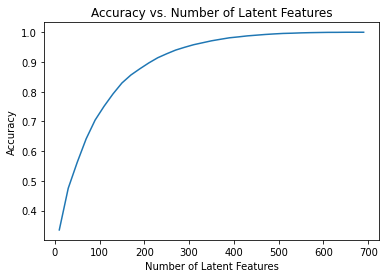

In [188]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

`4.` From the above, we can't really be sure how many features to use, because simply having a better way to predict the 1's and 0's of the matrix doesn't exactly give us an indication of if we are able to make good recommendations.  Instead, we might split our dataset into a training and test set of data, as shown in the cell below.  

Use the code from question 3 to understand the impact on accuracy of the training and test sets of data with different numbers of latent features. Using the split below: 

* How many users can we make predictions for in the test set?  
* How many users are we not able to make predictions for because of the cold start problem?
* How many articles can we make predictions for in the test set?  
* How many articles are we not able to make predictions for because of the cold start problem?

In [189]:
df_train = df.head(40000)
df_test = df.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    # Your code here

    user_item_train = create_user_item_matrix(df_train)

    user_item_test = create_user_item_matrix(df_test)

    test_idx = list(user_item_train.index)  # test user ids
    test_arts = list(user_item_train.columns)  # test article ids

    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

In [190]:
print(user_item_train.shape)
print(user_item_test.shape)

(4487, 714)
(682, 574)


In [191]:
# no. of users to make predictions for
np.intersect1d(user_item_test.index, user_item_train.index).shape

(20,)

In [192]:
# no. of articles to make predictions for
np.intersect1d(user_item_test.columns, user_item_train.columns).shape

(574,)

In [193]:
# Replace the values in the dictionary below
a = 662 
b = 574 
c = 20 
d = 0 


sol_4_dict = {
    'How many users can we make predictions for in the test set?': c, 
    'How many users in the test set are we not able to make predictions for because of the cold start problem?': a,
    'How many articles can we make predictions for in the test set?': b,
    'How many articles in the test set are we not able to make predictions for because of the cold start problem?': d
}

t.sol_4_test(sol_4_dict)

Awesome job!  That's right!  All of the test movies are in the training data, but there are only 20 test users that were also in the training set.  All of the other users that are in the test set we have no data on.  Therefore, we cannot make predictions for these users using SVD.


`5.` Now use the **user_item_train** dataset from above to find U, S, and V transpose using SVD. Then find the subset of rows in the **user_item_test** dataset that you can predict using this matrix decomposition with different numbers of latent features to see how many features makes sense to keep based on the accuracy on the test data. This will require combining what was done in questions `2` - `4`.

Use the cells below to explore how well SVD works towards making predictions for recommendations on the test data.  

In [194]:
# fit SVD on the user_item_train matrix
u_train, s_train, vt_train = np.linalg.svd(user_item_train) # fit svd similar to above then use the cells below
print(u_train.shape, s_train.shape, vt_train.shape)

(4487, 4487) (714,) (714, 714)


In [195]:
common_users = np.intersect1d(user_item_train.index, user_item_test.index)
common_arts = np.intersect1d(user_item_train.columns, user_item_test.columns)
user_item_test_corr = user_item_test.loc[common_users, common_arts]
print("user_item_test_corr shape: ", user_item_test_corr.shape)

common_users_idx = user_item_train.index.isin(user_item_test.index)
common_arts_idx = user_item_train.columns.isin(user_item_test.columns)
u_test = u_train[common_users_idx, :]
vt_test = vt_train[:, common_arts_idx]

user_item_test_corr shape:  (20, 574)


In [196]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs_train, sum_errs_test = [], []

for k in num_latent_feats:
    # restructure with k latent features
    s_train_k, u_train_k, vt_train_k = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    u_test_k, vt_test_k = u_test[:, :k], vt_test[:k, :]
    
    # take dot product
    user_item_train_est = np.around(np.dot(np.dot(u_train_k, s_train_k), vt_train_k))
    user_item_test_est = np.around(np.dot(np.dot(u_test_k, s_train_k), vt_test_k))
    
    # compute error for each prediction to actual value
    diffs_train = np.subtract(user_item_train, user_item_train_est)
    diffs_test = np.subtract(user_item_test_corr, user_item_test_est)
    
    # total errors and keep track of them
    err_train = np.sum(np.sum(np.abs(diffs_train)))
    sum_errs_train.append(err_train)
    err_test = np.sum(np.sum(np.abs(diffs_test)))
    sum_errs_test.append(err_test)

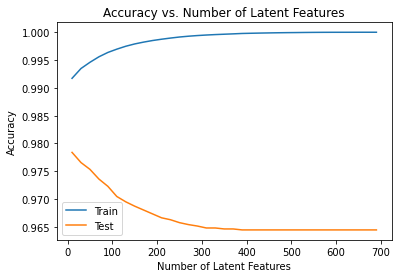

In [197]:
plt.plot(num_latent_feats, 1 - np.array(sum_errs_train)/(user_item_train.shape[0]*user_item_train.shape[1]), label="Train");
plt.plot(num_latent_feats, 1 - np.array(sum_errs_test)/(user_item_test_corr.shape[0]*user_item_test_corr.shape[1]), label="Test");
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');
plt.legend();

`6.` Use the cell below to comment on the results you found in the previous question. Given the circumstances of your results, discuss what you might do to determine if the recommendations you make with any of the above recommendation systems are an improvement to how users currently find articles? 

**Response:**
- whilst the Accuracy for predicting the user_item_train matrix grows with an increasing number of latent features, the test prediction accuracy on the other hand decreases.
- the prediction is biased by the imbalance of interaction results, since "0" as "no interaction" outweighs the small number of interactions marked with "1"
- the intersection of train and test data is relatively small, so that the model might not contain the necessary information to make predictions for users in the test data set.
- additional recommendation methods such as collaborative filtering combined with rank/knowledge based filtering should upgrade the given algorithm for a better result.
- however, to measure the effectiveness of the recommendation engine, an A/B Test could be used where equally shared user groups would be confronted with the different recommendation engine results. The highest amount of interactions on recommended articles identifies the winner.